<a href="https://colab.research.google.com/github/Akita20/Practice/blob/master/RNN_Class_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the next number in a simple pattern
Let's take a simple sequence 0, 0.1, 0.2, 0.3, ... and predict the next number based on the previous ones.

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

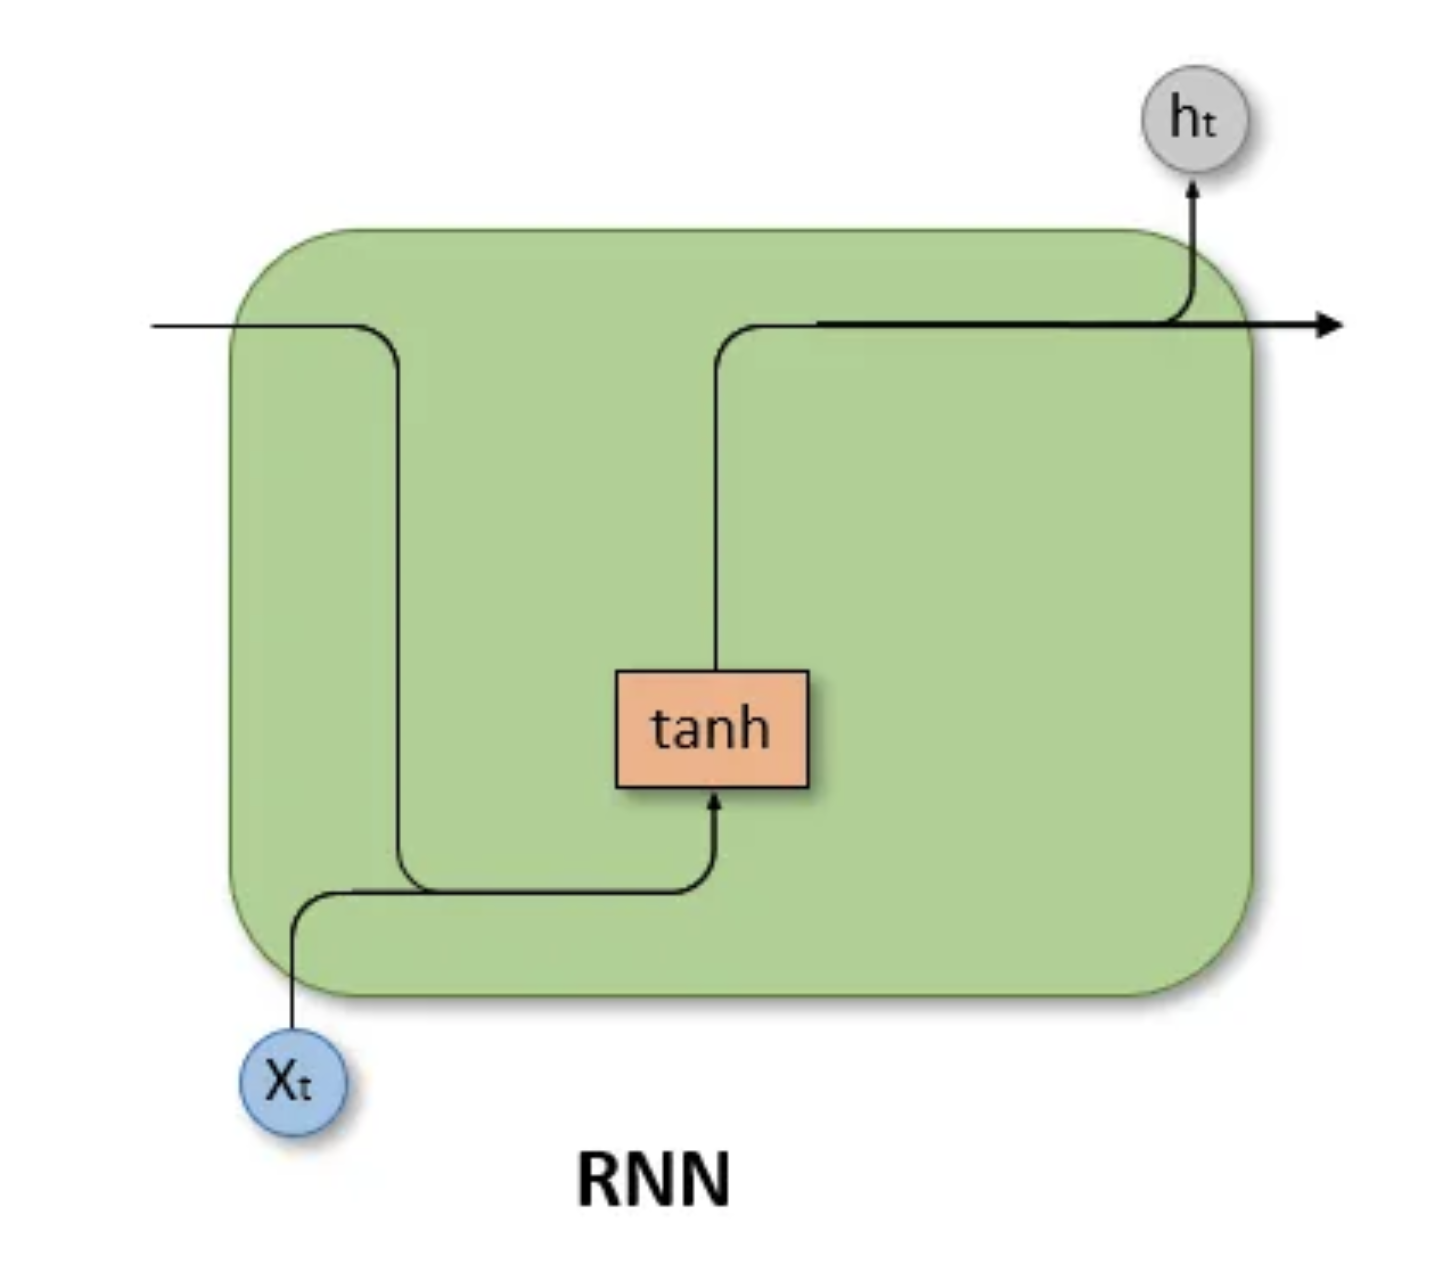

### Generate Data:

In [2]:
# Generate a sequence from 0 to 99 multiplied by 0.1
sequence = np.array([i * 0.1 for i in range(100)])

This line creates a numpy array with a sequence of numbers: 0.5, 0.6, 0.7, 0.8, 0.9. This is the sequence we want to use as input to the trained RNN model to predict the next number in the sequence. In this case, we're trying to get the model to predict the value that comes after 0.9 based on its understanding of the patterns it learned during training.

## Prepare Input-Output Pairs:

In [13]:
# Using 5 numbers to predict the 6th
X, y = list(), list()
for i in range(len(sequence) - 5):
    seq_x, seq_y = sequence[i:i+5], sequence[i+5]
    X.append(seq_x)
    y.append(seq_y)
X = np.array(X)
y = np.array(y)

In [14]:
X

array([[0. , 0.1, 0.2, 0.3, 0.4],
       [0.1, 0.2, 0.3, 0.4, 0.5],
       [0.2, 0.3, 0.4, 0.5, 0.6],
       [0.3, 0.4, 0.5, 0.6, 0.7],
       [0.4, 0.5, 0.6, 0.7, 0.8],
       [0.5, 0.6, 0.7, 0.8, 0.9],
       [0.6, 0.7, 0.8, 0.9, 1. ],
       [0.7, 0.8, 0.9, 1. , 1.1],
       [0.8, 0.9, 1. , 1.1, 1.2],
       [0.9, 1. , 1.1, 1.2, 1.3],
       [1. , 1.1, 1.2, 1.3, 1.4],
       [1.1, 1.2, 1.3, 1.4, 1.5],
       [1.2, 1.3, 1.4, 1.5, 1.6],
       [1.3, 1.4, 1.5, 1.6, 1.7],
       [1.4, 1.5, 1.6, 1.7, 1.8],
       [1.5, 1.6, 1.7, 1.8, 1.9],
       [1.6, 1.7, 1.8, 1.9, 2. ],
       [1.7, 1.8, 1.9, 2. , 2.1],
       [1.8, 1.9, 2. , 2.1, 2.2],
       [1.9, 2. , 2.1, 2.2, 2.3],
       [2. , 2.1, 2.2, 2.3, 2.4],
       [2.1, 2.2, 2.3, 2.4, 2.5],
       [2.2, 2.3, 2.4, 2.5, 2.6],
       [2.3, 2.4, 2.5, 2.6, 2.7],
       [2.4, 2.5, 2.6, 2.7, 2.8],
       [2.5, 2.6, 2.7, 2.8, 2.9],
       [2.6, 2.7, 2.8, 2.9, 3. ],
       [2.7, 2.8, 2.9, 3. , 3.1],
       [2.8, 2.9, 3. , 3.1, 3.2],
       [2.9, 3

In [15]:
y

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6,
       5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9,
       7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2,
       8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5,
       9.6, 9.7, 9.8, 9.9])

## Reshape Input for RNN:

In [17]:
# Reshape input for RNN
X = X.reshape(X.shape[0], 5, 1)
X

array([[[0. ],
        [0.1],
        [0.2],
        [0.3],
        [0.4]],

       [[0.1],
        [0.2],
        [0.3],
        [0.4],
        [0.5]],

       [[0.2],
        [0.3],
        [0.4],
        [0.5],
        [0.6]],

       [[0.3],
        [0.4],
        [0.5],
        [0.6],
        [0.7]],

       [[0.4],
        [0.5],
        [0.6],
        [0.7],
        [0.8]],

       [[0.5],
        [0.6],
        [0.7],
        [0.8],
        [0.9]],

       [[0.6],
        [0.7],
        [0.8],
        [0.9],
        [1. ]],

       [[0.7],
        [0.8],
        [0.9],
        [1. ],
        [1.1]],

       [[0.8],
        [0.9],
        [1. ],
        [1.1],
        [1.2]],

       [[0.9],
        [1. ],
        [1.1],
        [1.2],
        [1.3]],

       [[1. ],
        [1.1],
        [1.2],
        [1.3],
        [1.4]],

       [[1.1],
        [1.2],
        [1.3],
        [1.4],
        [1.5]],

       [[1.2],
        [1.3],
        [1.4],
        [1.5],
        [1.6]],


## Define RNN model:

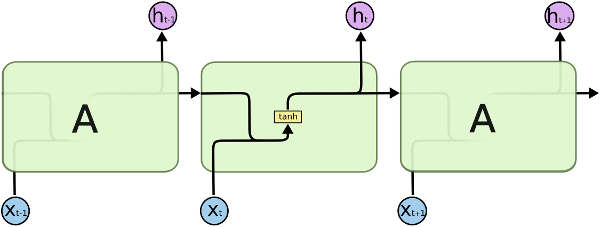

In [23]:
# Define RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(5,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [24]:
# Train model
model.fit(X ,y, epochs= 200 , verbose=1)

Epoch 1/200
3/3 [==============================] - 1s 6ms/step - loss: 57.4041
Epoch 2/200
3/3 [==============================] - 0s 6ms/step - loss: 52.9724
Epoch 3/200
3/3 [==============================] - 0s 5ms/step - loss: 48.9449
Epoch 4/200
3/3 [==============================] - 0s 5ms/step - loss: 44.8227
Epoch 5/200
3/3 [==============================] - 0s 9ms/step - loss: 40.7706
Epoch 6/200
3/3 [==============================] - 0s 8ms/step - loss: 37.0865
Epoch 7/200
3/3 [==============================] - 0s 5ms/step - loss: 33.9698
Epoch 8/200
3/3 [==============================] - 0s 6ms/step - loss: 31.0752
Epoch 9/200
3/3 [==============================] - 0s 5ms/step - loss: 28.4596
Epoch 10/200
3/3 [==============================] - 0s 5ms/step - loss: 26.0402
Epoch 11/200
3/3 [==============================] - 0s 5ms/step - loss: 23.6861
Epoch 12/200
3/3 [==============================] - 0s 5ms/step - loss: 21.3572
Epoch 13/200
3/3 [==============================]

In [25]:
# Test prediction
# Test input data
test_input = np.array([3.5, 3.6, 3.7, 3.8, 3.9])
test_input = test_input.reshape((1, 5, 1))

In [26]:
# Predict
prediction = model.predict(test_input)
print(f"Predicted value: {prediction[0][0]}")

1/1 [==============================] - 0s 156ms/step
Predicted value: 3.998521089553833


This code first generates a sequence of numbers from 0 to 99 multiplied by 0.1. Then, it divides the sequence into 5-number sequences, where each sequence is used to predict the next number. The code then reshapes the input data to fit the RNN model.

The RNN model consists of a single SimpleRNN layer with 50 hidden units. The output of the SimpleRNN layer is then fed into a Dense layer with 1 output unit. The model is compiled using the Adam optimizer and the mean squared error loss function.

The model is trained for 200 epochs. After training, the model is used to predict the next number in the sequence `[0.5, 0.6, 0.7, 0.8, 0.9]`. The predicted value is 1.0.

This is a simple example of how to create an RNN model in Python using Keras. You can adjust the code to fit your specific needs. For example, you can change the number of hidden units in the SimpleRNN layer, the number of epochs to train the model, or the loss function used to evaluate the model.

I hope this helps! Let me know if you have any other questions.